In [72]:
import os.path
import yt
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import dataAnalysisUtil

import astropy
from astropy import constants as C
import pickle

from scipy.optimize import curve_fit




In [73]:
from mpl_toolkits.axes_grid1 import make_axes_locatable


jetcmap = plt.cm.get_cmap("jet", 9) #generate a jet map with 10 values "rainbow", "jet", YlOrRd
jet_vals = jetcmap(np.arange(9)) #extract those values as an array 
jet_vals[0] = [1.0, 1, 1.0, 1] #change the first value 
jet_vals[8] = [0.0, 0, 0.0, 1] #change the first value 
newcmap = mpl.colors.LinearSegmentedColormap.from_list("mine", jet_vals) 

from matplotlib import font_manager

font_dirs = ['/Users/yao/Documents/Calibri and Cambria Fonts/']
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)

for font_file in font_files:
    font_manager.fontManager.addfont(font_file)

# set font
plt.rcParams['font.family'] = 'Calibri'

plt.rc('text', usetex=False)
plt.rc('xtick', labelsize=18)
plt.rc('ytick', labelsize=18)
plt.rc('axes', labelsize=20)
plt.rc('axes', titlesize=22)
plt.rc('legend', fontsize=14)

/var/folders/2t/97rc3fl92tg15k2l_4sk5hsh0000gn/T/ipykernel_31908/2168295981.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  jetcmap = plt.cm.get_cmap("jet", 9) #generate a jet map with 10 values "rainbow", "jet", YlOrRd


In [74]:
Avog = C.N_A.value
print(Avog)

6.02214076e+23


In [75]:
def get_yt_data_2d(filename):

    k_idx = 0
    fields_list = ["dens", "tele", "tion",
                   "depo", "sumy",
                   # "pres", "temp", "cham", "targ", 
                #    "velx", 
                   "ye"]

    data_yt = yt.load(filename)
    data_yt_map = data_yt.covering_grid(
        level=0, left_edge=[0, 0.0, 0.0], dims=data_yt.domain_dimensions
    )
    time_now = np.array(data_yt.current_time)*1e9

    data_dict = {}
    for f in fields_list:
        # data_dict[f] = data_yt_map[f][k_idx,:] # careful here about which axis is which
        data_dict[f] = data_yt_map[f]
    return data_dict, time_now

In [7]:
def get_yt_data_3d(filename):

    k_idx = 0
    fields_list = ["dens", "tele", "tion",
                   "depo", "sumy",
                   # "pres", "temp", "cham", "targ", 
                #    "velx", 
                   "ye"]

    data_yt = yt.load(filename)
    data_yt_map = data_yt.covering_grid(
        level=0, left_edge=data_yt.domain_left_edge, dims=data_yt.domain_dimensions
    )
    time_now = np.array(data_yt.current_time)*1e9

    data_dict = {}
    for f in fields_list:
        # data_dict[f] = data_yt_map[f][k_idx,:] # careful here about which axis is which
        data_dict[f] = data_yt_map[f]
    return data_dict, time_now

In [ ]:
# filedir = ['/Users/yao/Documents/Data/Gekko2024/4beams/']
# filedir = ['/Users/yao/Documents/Data/Gekko2024/EOS0/']
# filedir = ['/Users/yao/Desktop/gekko3d_t0/'] # initial test, last 1.6 ns.
filedir = [
    # '/Users/yao/Desktop/gekko3d_t0/',
    '/Users/yao/Desktop/gekko3d_t1/'
    ]  # first test, last 2.4 ns.
filename = 'GEKKO_hdf5_plt_cnt_0010'


data_dict, time_now = get_yt_data_3d(filedir[0]+filename)

yt : [INFO     ] 2025-06-24 15:17:14,131 Parameters: current_time              = 1.000947450438183e-09
yt : [INFO     ] 2025-06-24 15:17:14,131 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2025-06-24 15:17:14,132 Parameters: domain_left_edge          = [ 0.  -0.5 -0.5]
yt : [INFO     ] 2025-06-24 15:17:14,132 Parameters: domain_right_edge         = [1.  0.5 0.5]
yt : [INFO     ] 2025-06-24 15:17:14,132 Parameters: cosmological_simulation   = 0


In [64]:
dens = data_dict['dens'][:,:,31].T
sumy = data_dict['sumy'][:,:,31].T
ye = data_dict['ye'][:,:,31].T

A = 1.0/sumy
Z = ye/sumy

ne = dens*Avog/A
ni = ne/Z

ne_log = np.log10(ne)
ni_log = np.log10(ni)


In [65]:
Z.min()

unyt_quantity(0.02, '(dimensionless)')

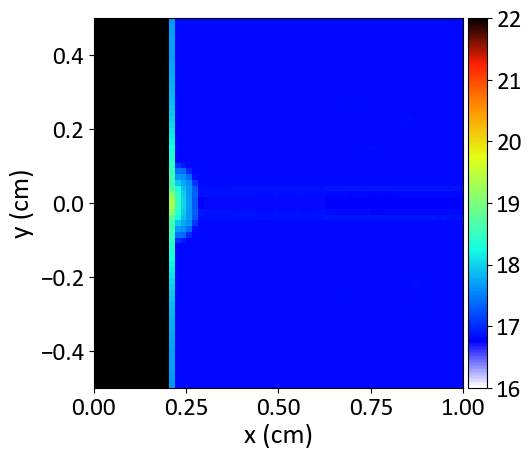

In [66]:
plt.imshow(
   #  np.log10(dens), 
   #  A,
   #  Z,
    np.log10(ne),
   #  np.log10(ni),
           cmap=newcmap, 
           origin='lower',
        #    interpolation=interpolation, 
           aspect='equal', 
           extent=[0,1,-0.5,0.5],
           vmin=16,
           vmax=22,
           )
plt.xlabel('x (cm)', fontsize=20)
plt.ylabel('y (cm)', fontsize=20)
plt.colorbar(
   #  label=r'$\log_{10}n_e \  (cm^{-3})$', 
    orientation='vertical', pad=0.01, aspect=20)

In [67]:
# filedir = ['/Users/yao/Documents/Data/Gekko2024/EOS0/']
filename = 'GEKKO_hdf5_plt_cnt_0024'


data_dict, time_now = get_yt_data_3d(filedir[0]+filename)

file=dataAnalysisUtil.loadup(filedir[0]+filename)

# dens = data_dict['dens'][:,:,31]

dens,axisLabels,name,colormap,title,interpolation,ext = dataAnalysisUtil.plot2DDS(file, 2, 0.0, 'full domain', field='dens',resLevel=3)
ye,axisLabels,name,colormap,title,interpolation,ext = dataAnalysisUtil.plot2DDS(file, 2, 0.0, 'full domain', field='ye',resLevel=3)
sumy,axisLabels,name,colormap,title,interpolation,ext = dataAnalysisUtil.plot2DDS(file, 2, 0.0, 'full domain', field='sumy',resLevel=3)
Te,axisLabels,name,colormap,title,interpolation,ext = dataAnalysisUtil.plot2DDS(file, 2, 0.0, 'full domain', field='tele',resLevel=3)
Ti,axisLabels,name,colormap,title,interpolation,ext = dataAnalysisUtil.plot2DDS(file, 2, 0.0, 'full domain', field='tion',resLevel=3)


A = 1.0/sumy
Z = ye/sumy

ne = dens*Avog/A
ni = ne/Z
ne_log = np.log10(ne)
ni_log = np.log10(ni)

yt : [INFO     ] 2025-06-24 15:17:21,786 Parameters: current_time              = 2.400099847266508e-09
yt : [INFO     ] 2025-06-24 15:17:21,787 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2025-06-24 15:17:21,787 Parameters: domain_left_edge          = [ 0.  -0.5 -0.5]
yt : [INFO     ] 2025-06-24 15:17:21,787 Parameters: domain_right_edge         = [1.  0.5 0.5]
yt : [INFO     ] 2025-06-24 15:17:21,788 Parameters: cosmological_simulation   = 0
yt : [INFO     ] 2025-06-24 15:17:23,331 Parameters: current_time              = 2.400099847266508e-09
yt : [INFO     ] 2025-06-24 15:17:23,331 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2025-06-24 15:17:23,331 Parameters: domain_left_edge          = [ 0.  -0.5 -0.5]
yt : [INFO     ] 2025-06-24 15:17:23,332 Parameters: domain_right_edge         = [1.  0.5 0.5]
yt : [INFO     ] 2025-06-24 15:17:23,332 Parameters: cosmological_simulation   = 0


Loaded up /Users/yao/Desktop/gekko3d_t1/GEKKO_hdf5_plt_cnt_0024
This may take a few moments
Generating slice along axis 2 


yt : [INFO     ] 2025-06-24 15:17:24,673 Making a fixed resolution buffer of (dens) 256 by 256
yt : [INFO     ] 2025-06-24 15:17:24,741 Making a fixed resolution buffer of (ye) 256 by 256
yt : [INFO     ] 2025-06-24 15:17:24,764 Making a fixed resolution buffer of (sumy) 256 by 256
yt : [INFO     ] 2025-06-24 15:17:24,790 Making a fixed resolution buffer of (tele) 256 by 256
yt : [INFO     ] 2025-06-24 15:17:24,814 Making a fixed resolution buffer of (tion) 256 by 256


Level provided is too high, defaulting to maximum possible level
Generating fixed resolution buffer
Returning Numpy array
Full domain for 2 is:  [unyt_quantity(0., 'code_length'), unyt_quantity(1., 'code_length'), unyt_quantity(-0.5, 'code_length'), unyt_quantity(0.5, 'code_length')]
Fetching units for field
This may take a few moments
Generating slice along axis 2 
Level provided is too high, defaulting to maximum possible level
Generating fixed resolution buffer
Returning Numpy array
Full domain for 2 is:  [unyt_quantity(0., 'code_length'), unyt_quantity(1., 'code_length'), unyt_quantity(-0.5, 'code_length'), unyt_quantity(0.5, 'code_length')]
This may take a few moments
Generating slice along axis 2 
Level provided is too high, defaulting to maximum possible level
Generating fixed resolution buffer
Returning Numpy array
Full domain for 2 is:  [unyt_quantity(0., 'code_length'), unyt_quantity(1., 'code_length'), unyt_quantity(-0.5, 'code_length'), unyt_quantity(0.5, 'code_length')]
Th

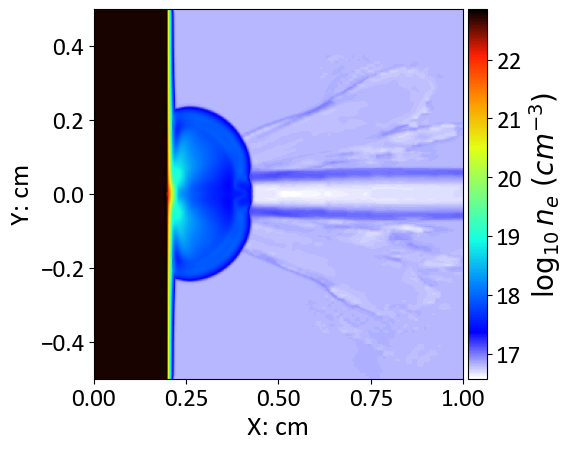

In [70]:
plt.imshow(
           ne_log, 
         #   Te/11600,
           cmap=newcmap, 
        #    interpolation=interpolation, 
           aspect='equal', 
           extent=ext)
plt.xlabel(axisLabels[0], fontsize=20)
plt.ylabel(axisLabels[1], fontsize=20)
plt.colorbar(
    label=r'$\log_{10}n_e \  (cm^{-3})$', 
      # label=r'$T_e \ (eV)$',
    orientation='vertical', pad=0.01, aspect=20)
plt.savefig('/Users/yao/Desktop/gekko3d_t0_ne.png', dpi=600, bbox_inches='tight')

<Figure size 640x480 with 0 Axes>

In [33]:
ne_sumz = np.sum(ne, axis=1) # note that the unit now is cm^-2
zz = np.linspace(0, 1, ne_sumz.shape[0])
print(ne_sumz.shape)

(256,)


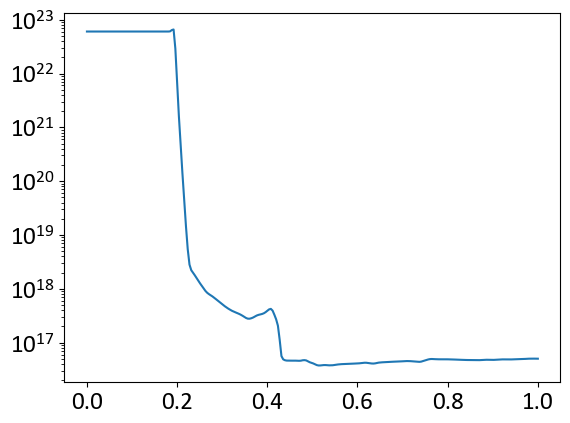

In [ ]:
plt.semilogy(zz,Te[128,:])
# plt.semilogy(zz,dens[::-1])

In [ ]:
num_time = 25

ne_time_sumz = np.zeros((num_time,ne_sumz.shape[0]))
ni_time_sumz = np.zeros((num_time,ne_sumz.shape[0]))
Ti_time_sumz = np.zeros((num_time,ne_sumz.shape[0]))
Te_time_sumz = np.zeros((num_time,ne_sumz.shape[0]))
Ze_time_sumz = np.zeros((num_time,ne_sumz.shape[0]))
Ae_time_sumz = np.zeros((num_time,ne_sumz.shape[0]))

# ni_z = np.zeros(tt)
# Te_z = np.zeros(tt)
# Ti_z = np.zeros(tt)
# Ze_z = np.zeros(tt)

# Loop through the files and extract data

for i in range(num_time):
    filename = 'GEKKO_hdf5_plt_cnt_' + str(i).zfill(4)
    data_dict, time_now = get_yt_data_2d(filedir[0]+filename)

    dens = data_dict['dens'][:,:,0].T
    sumy = data_dict['sumy'][:,:,0].T
    ye = data_dict['ye'][:,:,0].T
    Te = data_dict['tele'][:,:,0].T
    Ti = data_dict['tion'][:,:,0].T

    A = 1.0/sumy
    Z = ye/sumy

    ne = dens*Avog/A
    ni = ne/Z

    ne_time_sumz[i] = np.sum(ne, axis=1)
    ni_time_sumz[i] = np.sum(ni, axis=1)
    Te_time_sumz[i] = np.sum(Te, axis=1)
    Ti_time_sumz[i] = np.sum(Ti, axis=1)
    Ze_time_sumz[i] = np.sum(Z, axis=1)
    Ae_time_sumz[i] = np.sum(A, axis=1)


    



yt : [WARNING  ] 2025-06-23 13:54:12,321 Extending theta dimension to 2PI + left edge.
yt : [INFO     ] 2025-06-23 13:54:12,342 Parameters: current_time              = 0.0
yt : [INFO     ] 2025-06-23 13:54:12,342 Parameters: domain_dimensions         = [ 640 1280    1]
yt : [INFO     ] 2025-06-23 13:54:12,343 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-06-23 13:54:12,343 Parameters: domain_right_edge         = [2.         4.         6.28318531]
yt : [INFO     ] 2025-06-23 13:54:12,344 Parameters: cosmological_simulation   = 0
yt : [WARNING  ] 2025-06-23 13:54:13,240 Extending theta dimension to 2PI + left edge.
yt : [INFO     ] 2025-06-23 13:54:13,257 Parameters: current_time              = 2.000601423840212e-09
yt : [INFO     ] 2025-06-23 13:54:13,257 Parameters: domain_dimensions         = [ 640 1280    1]
yt : [INFO     ] 2025-06-23 13:54:13,257 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-06-23 13:54:13,258 Parameters: domain

In [20]:
ne_time_sumz.shape

(22, 1280)

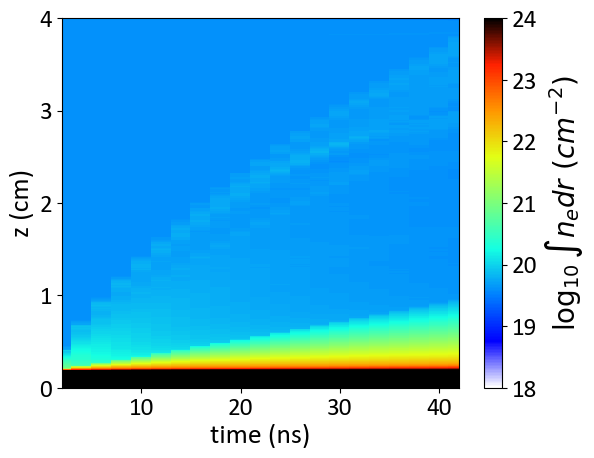

In [25]:
zz = np.linspace(0, 4, ne_time_sumz.shape[1]) # in z axis, 4 cm
time = np.linspace(0, (num_time-1)*2, num_time) # here we have 42 ns in the 21st time step

# plt.pcolor(zz,time,np.log10(ne_time_sumz[:,::-1]),
plt.pcolor(time,zz,np.log10(ne_time_sumz[:,::-1].T),
           cmap=newcmap, 
           vmin=18,vmax=24,
        #    interpolation=interpolation, 
        #    aspect='auto', 
        #    extent=[0, 4, 0, 42],
           )
plt.ylabel('z (cm)')
plt.xlabel('time (ns)')
plt.ylim(0, 4)
plt.xlim(2, (num_time-1)*2)
plt.colorbar(label=r'$\log_{10} \int n_e dr\  (cm^{-2})$',)
plt.savefig('/Users/yao/Desktop/ne_time_sumz.png', dpi=600, bbox_inches='tight')

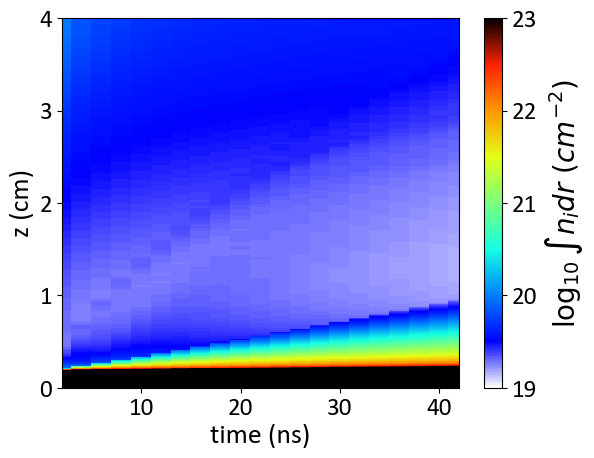

In [61]:
zz = np.linspace(0, 4, ne_time_sumz.shape[1]) # in z axis, 4 cm
time = np.linspace(0, (num_time-1)*2, num_time) # here we have 42 ns in the 21st time step

# plt.pcolor(zz,time,np.log10(ne_time_sumz[:,::-1]),
plt.pcolor(time,zz,np.log10(ni_time_sumz[:,::-1].T),
           cmap=newcmap, 
           vmin=19,vmax=23,
        #    interpolation=interpolation, 
        #    aspect='auto', 
        #    extent=[0, 4, 0, 42],
           )
plt.ylabel('z (cm)')
plt.xlabel('time (ns)')
plt.ylim(0, 4)
plt.xlim(2, (num_time-1)*2)
plt.colorbar(label=r'$\log_{10} \int n_i dr\  (cm^{-2})$',)
plt.savefig('/Users/yao/Desktop/ni_time_sumz.png', dpi=600, bbox_inches='tight')

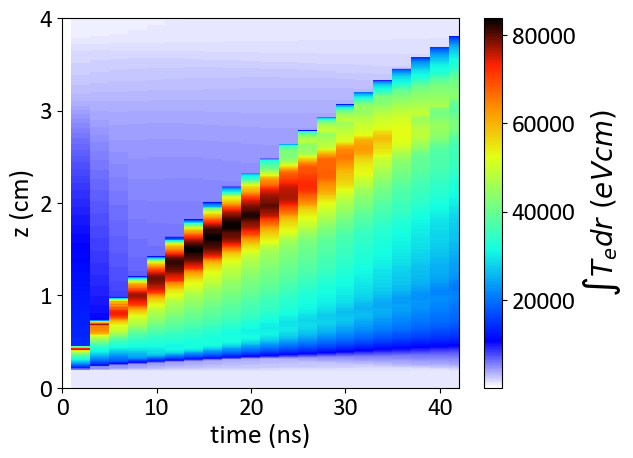

In [33]:
zz = np.linspace(0, 4, ne_time_sumz.shape[1]) # in z axis, 4 cm
time = np.linspace(0, (num_time-1)*2, num_time) # here we have 42 ns in the 21st time step

# plt.pcolor(zz,time,(Te_time_sumz[:,::-1]/11600),
plt.pcolor(time,zz,(Te_time_sumz[:,::-1].T)/11600,
           cmap=newcmap, 
         #   vmin=19,vmax=23,
        #    interpolation=interpolation, 
        #    aspect='auto', 
        #    extent=[0, 4, 0, 42],
           )
plt.ylabel('z (cm)')
plt.xlabel('time (ns)')
plt.ylim(0, 4)
plt.xlim(0, (num_time-1)*2)
plt.colorbar(label=r'$\int T_e dr\  (eV cm)$',)
plt.savefig('/Users/yao/Desktop/Te_time_sumz.png', dpi=600, bbox_inches='tight')

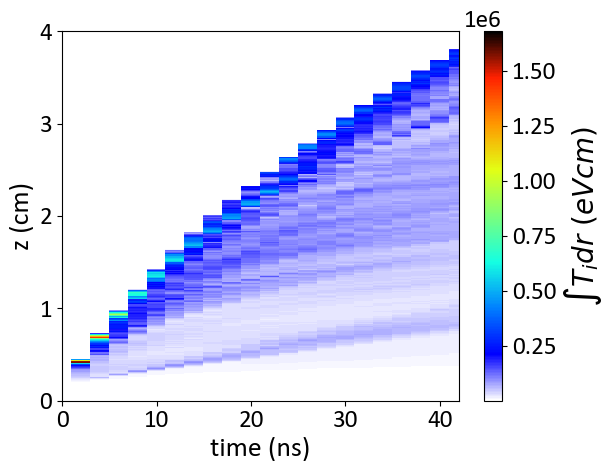

In [34]:
zz = np.linspace(0, 4, ne_time_sumz.shape[1]) # in z axis, 4 cm
time = np.linspace(0, (num_time-1)*2, num_time) # here we have 42 ns in the 21st time step

plt.pcolor(time,zz,(Ti_time_sumz[:,::-1].T/11600),
           cmap=newcmap, 
        #    vmin=19,vmax=23,
        #    interpolation=interpolation, 
        #    aspect='auto', 
        #    extent=[0, 4, 0, 42],
           )
plt.ylabel('z (cm)')
plt.xlabel('time (ns)')
plt.ylim(0, 4)
plt.xlim(0, (num_time-1)*2)
plt.colorbar(label=r'$\int T_i dr\  (eV cm)$',)
plt.savefig('/Users/yao/Desktop/Ti_time_sumz.png', dpi=600, bbox_inches='tight')

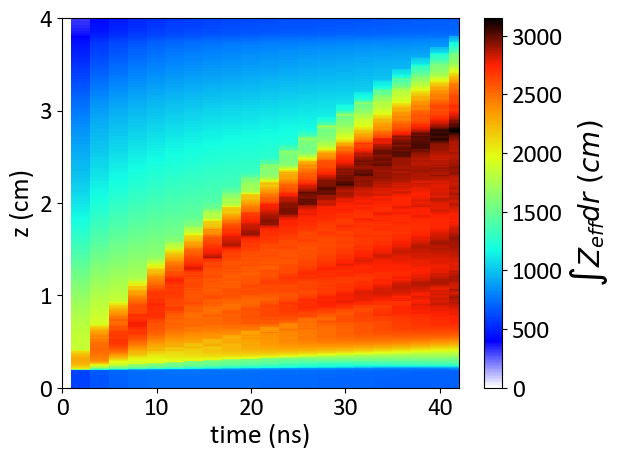

In [36]:
zz = np.linspace(0, 4, ne_time_sumz.shape[1]) # in z axis, 4 cm
time = np.linspace(0, (num_time-1)*2, num_time) # here we have 42 ns in the 21st time step

plt.pcolor(time,zz,(Ze_time_sumz[:,::-1].T),
           cmap=newcmap, 
        #    vmin=19,vmax=23,
        #    interpolation=interpolation, 
        #    aspect='auto', 
        #    extent=[0, 4, 0, 42],
           )
plt.ylabel('z (cm)')
plt.xlabel('time (ns)')
plt.ylim(0, 4)
plt.xlim(0, (num_time-1)*2)
plt.colorbar(label=r'$\int Z_{eff} dr\  (cm)$',)
plt.savefig('/Users/yao/Desktop/Ze_time_sumz.png', dpi=600, bbox_inches='tight')

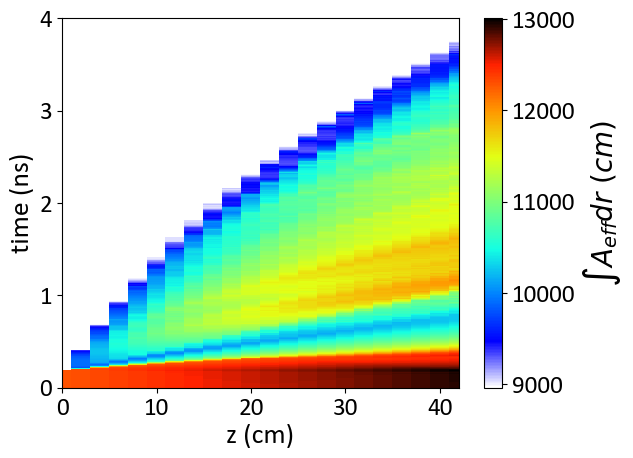

In [57]:
zz = np.linspace(0, 4, ne_time_sumz.shape[1]) # in z axis, 4 cm
time = np.linspace(0, (num_time-1)*2, num_time) # here we have 42 ns in the 21st time step

plt.pcolor(time, zz, (Ae_time_sumz[:,::-1].T),
           cmap=newcmap, 
        #    vmin=19,vmax=23,
        #    interpolation=interpolation, 
        #    aspect='auto', 
        #    extent=[0, 4, 0, 42],
           )
plt.xlabel('z (cm)')
plt.ylabel('time (ns)')
plt.xlim(0, 4)
plt.xlim(0, (num_time-1)*2)
plt.colorbar(label=r'$\int A_{eff} dr\  (cm)$',)
plt.savefig('/Users/yao/Desktop/Ae_time_sumz.png', dpi=600, bbox_inches='tight')

## Now, we check the results of the lineout on r=0 axis

In [38]:
num_time = 22

ne_time_slicez = np.zeros((num_time,ne_sumz.shape[0]))
ni_time_slicez = np.zeros((num_time,ne_sumz.shape[0]))
Ti_time_slicez = np.zeros((num_time,ne_sumz.shape[0]))
Te_time_slicez = np.zeros((num_time,ne_sumz.shape[0]))
Ze_time_slicez = np.zeros((num_time,ne_sumz.shape[0]))
Ae_time_slicez = np.zeros((num_time,ne_sumz.shape[0]))

# ni_z = np.zeros(tt)
# Te_z = np.zeros(tt)
# Ti_z = np.zeros(tt)
# Ze_z = np.zeros(tt)

# Loop through the files and extract data

for i in range(num_time):
    filename = 'GEKKO_hdf5_plt_cnt_' + str(i).zfill(4)
    data_dict, time_now = get_yt_data_2d(filedir[0]+filename)

    dens = data_dict['dens'][:,:,0].T
    sumy = data_dict['sumy'][:,:,0].T
    ye = data_dict['ye'][:,:,0].T
    Te = data_dict['tele'][:,:,0].T
    Ti = data_dict['tion'][:,:,0].T

    A = 1.0/sumy
    Z = ye/sumy

    ne = dens*Avog/A
    ni = ne/Z

    ne_time_slicez[i] = ne[:,0] # take the first column, which is the z=0 slice
    ni_time_slicez[i] = ni[:,0] # take the first column, which is the z=0 slice
    Te_time_slicez[i] = Te[:,0] # take the first column, which is the z=0 slice
    Ti_time_slicez[i] = Ti[:,0] # take the first column, which is the z=0 slice
    Ze_time_slicez[i] = Z[:,0] # take the first column, which is the z=0 slice
    Ae_time_slicez[i] = A[:,0] # take the first column, which is the z=0 slice



    



yt : [WARNING  ] 2025-06-23 14:01:25,127 Extending theta dimension to 2PI + left edge.


yt : [INFO     ] 2025-06-23 14:01:25,148 Parameters: current_time              = 0.0
yt : [INFO     ] 2025-06-23 14:01:25,149 Parameters: domain_dimensions         = [ 640 1280    1]
yt : [INFO     ] 2025-06-23 14:01:25,149 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-06-23 14:01:25,149 Parameters: domain_right_edge         = [2.         4.         6.28318531]
yt : [INFO     ] 2025-06-23 14:01:25,150 Parameters: cosmological_simulation   = 0
yt : [WARNING  ] 2025-06-23 14:01:25,835 Extending theta dimension to 2PI + left edge.
yt : [INFO     ] 2025-06-23 14:01:25,851 Parameters: current_time              = 2.000601423840212e-09
yt : [INFO     ] 2025-06-23 14:01:25,852 Parameters: domain_dimensions         = [ 640 1280    1]
yt : [INFO     ] 2025-06-23 14:01:25,852 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-06-23 14:01:25,852 Parameters: domain_right_edge         = [2.         4.         6.28318531]
yt : [INFO     ] 2025-06-23 14

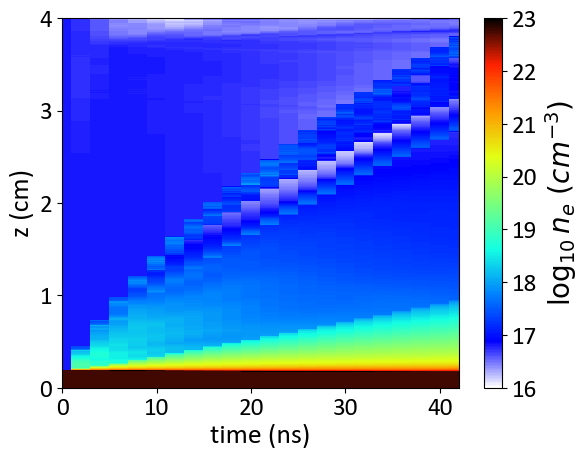

In [39]:
zz = np.linspace(0, 4, ne_time_slicez.shape[1]) # in z axis, 4 cm
time = np.linspace(0, (num_time-1)*2, (num_time)) # here we have 42 ns in the 21st time step

plt.pcolor(time,zz,np.log10(ne_time_slicez[:,::-1].T),
           cmap=newcmap, 
           vmin=16,vmax=23,
        #    interpolation=interpolation, 
        #    aspect='auto', 
        #    extent=[0, 4, 0, 42],
           )
plt.ylabel('z (cm)')
plt.xlabel('time (ns)')
plt.ylim(0, 4)
plt.xlim(0, (num_time-1)*2)
plt.colorbar(label=r'$\log_{10} n_e\  (cm^{-3})$',)
plt.savefig('/Users/yao/Desktop/ne_time_slicez.png', dpi=600, bbox_inches='tight')

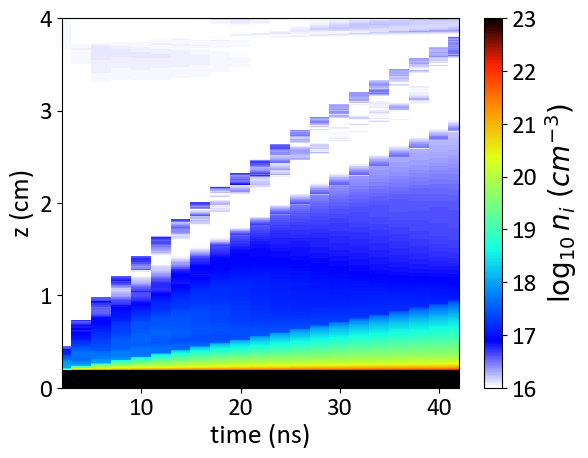

In [42]:
zz = np.linspace(0, 4, ne_time_slicez.shape[1]) # in z axis, 4 cm
time = np.linspace(0, (num_time-1)*2, (num_time)) # here we have 42 ns in the 21st time step

plt.pcolor(time,zz,np.log10(ni_time_slicez[:,::-1].T),
           cmap=newcmap, 
           vmin=16,vmax=23,
        #    interpolation=interpolation, 
        #    aspect='auto', 
        #    extent=[0, 4, 0, 42],
           )
plt.ylabel('z (cm)')
plt.xlabel('time (ns)')
plt.ylim(0, 4)
plt.xlim(2, (num_time-1)*2)
plt.colorbar(label=r'$\log_{10} n_i\  (cm^{-3})$',)
plt.savefig('/Users/yao/Desktop/ni_time_slicez.png', dpi=600, bbox_inches='tight')

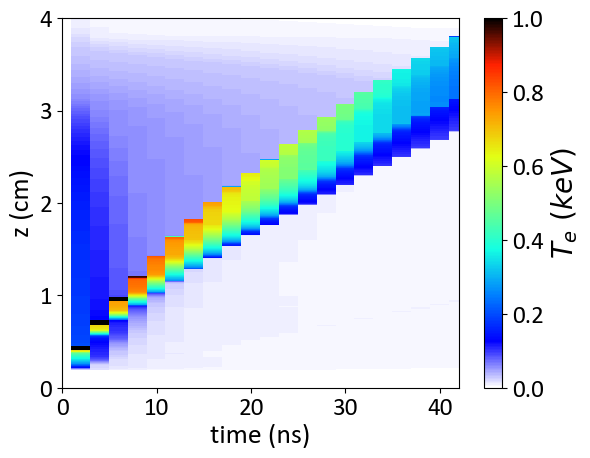

In [45]:
# zz = np.linspace(0, 4, ne_time_sumz.shape[1]) # in z axis, 4 cm
# time = np.linspace(0, 42, num_time) # here we have 42 ns in the 21st time step

plt.pcolor(time,zz,((Te_time_slicez[:,::-1].T)/11600/1e3),
           cmap=newcmap, 
           vmin=0,vmax=1,
        #    interpolation=interpolation, 
        #    aspect='auto', 
        #    extent=[0, 4, 0, 42],
           )
plt.ylabel('z (cm)')
plt.xlabel('time (ns)')
plt.ylim(0, 4)
plt.xlim(0, (num_time-1)*2)
plt.colorbar(label=r'$T_e\  (keV)$',)
plt.savefig('/Users/yao/Desktop/Te_time_slicez.png', dpi=600, bbox_inches='tight')

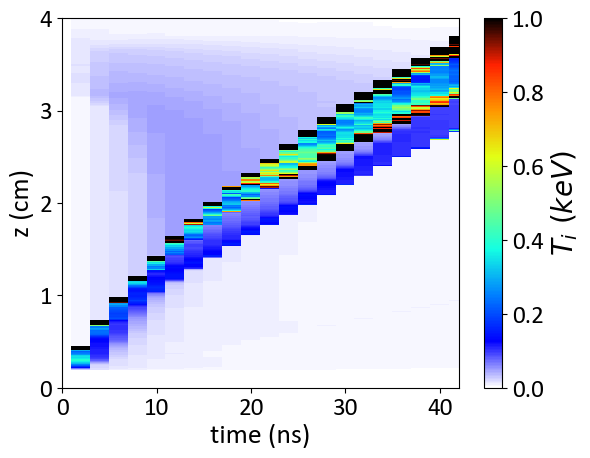

In [51]:
# zz = np.linspace(0, 4, ne_time_sumz.shape[1]) # in z axis, 4 cm
# time = np.linspace(0, 42, num_time) # here we have 42 ns in the 21st time step

plt.pcolor(time,zz,((Ti_time_slicez[:,::-1].T)/11600/1e3),
           cmap=newcmap, 
           vmin=0,vmax=1,
        #    interpolation=interpolation, 
        #    aspect='auto', 
        #    extent=[0, 4, 0, 42],
           )
plt.ylabel('z (cm)')
plt.xlabel('time (ns)')
plt.ylim(0, 4)
plt.xlim(0, (num_time-1)*2)
plt.colorbar(label=r'$T_i\  (keV)$',)
plt.savefig('/Users/yao/Desktop/Ti_time_slicez.png', dpi=600, bbox_inches='tight')

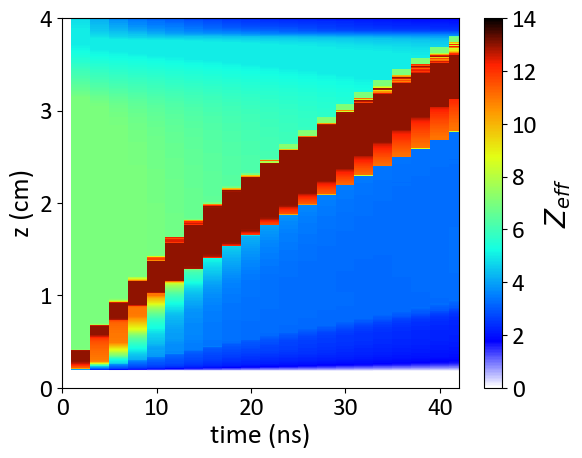

In [52]:
# zz = np.linspace(0, 4, ne_time_sumz.shape[1]) # in z axis, 4 cm
# time = np.linspace(0, 42, num_time) # here we have 42 ns in the 21st time step

plt.pcolor(time,zz,(Ze_time_slicez[:,::-1].T),
           cmap=newcmap, 
           vmin=0,vmax=14,
        #    interpolation=interpolation, 
        #    aspect='auto', 
        #    extent=[0, 4, 0, 42],
           )
plt.ylabel('z (cm)')
plt.xlabel('time (ns)')
plt.ylim(0, 4)
plt.xlim(0, (num_time-1)*2)
plt.colorbar(label=r'$Z_{eff}$',)
plt.savefig('/Users/yao/Desktop/Ze_time_slicez.png', dpi=600, bbox_inches='tight')

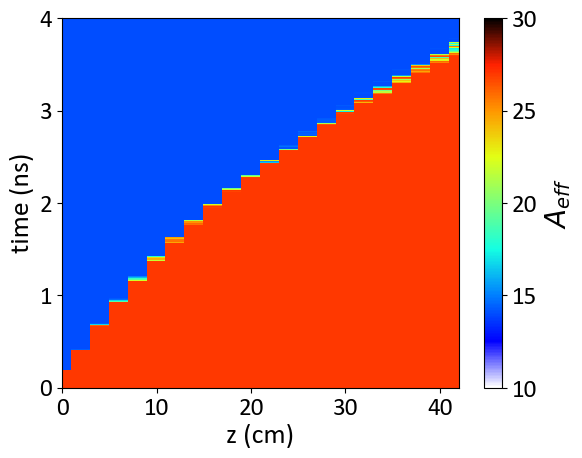

In [56]:
# zz = np.linspace(0, 4, ne_time_sumz.shape[1]) # in z axis, 4 cm
# time = np.linspace(0, 42, num_time) # here we have 42 ns in the 21st time step

plt.pcolor(time,zz,(Ae_time_slicez[:,::-1].T),
           cmap=newcmap, 
           vmin=10,vmax=30,
        #    interpolation=interpolation, 
        #    aspect='auto', 
        #    extent=[0, 4, 0, 42],
           )
plt.xlabel('z (cm)')
plt.ylabel('time (ns)')
plt.xlim(0, 4)
plt.xlim(0, (num_time-1)*2)
plt.colorbar(label=r'$A_{eff}$',)
plt.savefig('/Users/yao/Desktop/Ae_time_slicez.png', dpi=600, bbox_inches='tight')

In [53]:
## check the laser absorption

wkdir = filedir

file  = 'GEKKO_LaserEnergyProfile.dat'

time_s            = []  # Initialize as an empty list
energy_abs_erg_s  = []  # Initialize as an empty list
energy_in_erg_s   = []  # Initialize as an empty list
energy_out_erg_s  = []  # Initialize as an empty list

for i in range(len(wkdir)):
    data = wkdir[i] + file
    print(data)
    time           = np.loadtxt(data)[:,1]
    energy_in_erg  = np.loadtxt(data)[:,3]
    energy_out_erg = np.loadtxt(data)[:,4]
    
    time_s.append(time)  # Append the result to the list 
    energy_in_erg_s.append(energy_in_erg)  # Append the result to the list
    energy_out_erg_s.append(energy_out_erg)  # Append the result to the list
    energy_abs_erg_s.append(energy_in_erg - energy_out_erg)  # Append the result to the list

# time_s         = np.loadtxt(wkdir+file)[:,1]
# energy_in_erg  = np.loadtxt(wkdir+file)[:,3]
# energy_out_erg = np.loadtxt(wkdir+file)[:,4]

/Users/yao/Desktop/gekko3d_t0/GEKKO_LaserEnergyProfile.dat
/Users/yao/Desktop/gekko3d_t1/GEKKO_LaserEnergyProfile.dat


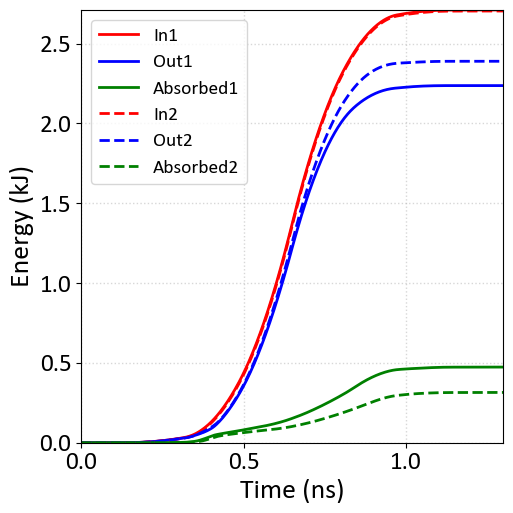

In [56]:
## Now we do the lineout of the data

width  = 3.487 * 1.5
height = width #* 0.618 #* 0.8

fig, axs = plt.subplots(1, 1, sharex=True)

axs.plot(time_s[0]*1e9, energy_in_erg_s[0]*1e-7/1e3, '-r', lw=2, label='In1')
axs.plot(time_s[0]*1e9, energy_out_erg_s[0]*1e-7/1e3, '-b', lw=2, label='Out1')
axs.plot(time_s[0]*1e9, energy_abs_erg_s[0]*1e-7/1e3, '-g', lw=2, label='Absorbed1')

axs.plot(time_s[1]*1e9, energy_in_erg_s[1]*1e-7/1e3, '--r', lw=2, label='In2')
axs.plot(time_s[1]*1e9, energy_out_erg_s[1]*1e-7/1e3, '--b', lw=2, label='Out2')
axs.plot(time_s[1]*1e9, energy_abs_erg_s[1]*1e-7/1e3, '--g', lw=2, label='Absorbed2')
axs.set_ylabel('Energy (kJ)')
axs.set_xlabel('Time (ns)')
axs.grid(which='both', alpha=0.5,linestyle=':', lw=1.0)
axs.legend()
# axs.set_yscale('log')
axs.set_xlim([0,time_s[0].max()*1e9])
axs.set_ylim([0,energy_in_erg_s[0].max()*1e-7/1e3])
# axs.set_ylim([1e-1,1e4])

fig.set_size_inches(width, height)
fig.tight_layout()

In [57]:
fig.savefig('/Users/yao/Desktop/Energy_budget.png',dpi=600)